# Mini-Project 3:  Network Intrusion Detection


### Import libraries

In [0]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
import csv
import numpy as np
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn import datasets,linear_model, preprocessing,utils
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from matplotlib.pyplot import figure, show
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc


from keras.models import Sequential

import json
import csv
import pandas as pd
import numpy as np
import sklearn.feature_extraction.text as tfidf
from sklearn.feature_extraction.text import CountVectorizer
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn import datasets,linear_model, preprocessing,utils
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from matplotlib.pyplot import figure, show



import json
import csv
import pandas as pd
import numpy as np
import scipy as sci
import keras
from keras.models import Sequential
from keras import regularizers
from keras.layers.core import Dense, Activation
from keras.layers import Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
import io
import requests
import tensorflow as tf
from scipy import sparse
from sklearn.model_selection import train_test_split
import sklearn.feature_extraction.text as sk_text
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
import collections
from sklearn import preprocessing
import matplotlib.pyplot as plt
import shutil
import os

Using TensorFlow backend.


In [0]:
def classify_connections(outcome):
    if(outcome =="normal."):
        outcome = 0  
    else: 
        outcome = 1
    
    return outcome


def Z_score(column):
    df_network[column] = zscore(df_network[column])
    
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [0]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [0]:
# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

### read network intusion detection file

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df_network1 = pd.read_csv("drive/My Drive/rr/network_intrusion_data.csv") 

In [0]:
df_network=df_network1

### Adding column headers

In [0]:
df_network.columns = [
'duration',
'protocol_type',
'service',
'flag',
'src_bytes',
'dst_bytes',
'land',
'wrong_fragment',
'urgent',
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds',
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
'outcome'
]

In [0]:
df_network.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [0]:
df_network.shape

(494020, 42)

###  Drop duplicates

In [0]:
df_network = df_network.drop_duplicates()

In [0]:
df_network.shape

(145585, 42)

### Drop the rows where at least one element is missing

In [0]:
df_network = df_network.dropna()

In [0]:
df_network.shape

(145585, 42)

In [0]:
df1 =df_network.outcome.unique()

In [0]:
df1.shape

(23,)

##Getting all Unique Outcome

In [0]:
df_network.outcome.unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [0]:
name = df_network.outcome.unique()

In [0]:
name.shape

(23,)

### group by protocol type

In [0]:
df_network.groupby('protocol_type').count()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
protocol_type,,,,,,,,,,,,,,,,,,,,,
icmp,2406,2406,2406,2406,2406,2406,2406,2406,2406,2406,...,2406,2406,2406,2406,2406,2406,2406,2406,2406,2406
tcp,130912,130912,130912,130912,130912,130912,130912,130912,130912,130912,...,130912,130912,130912,130912,130912,130912,130912,130912,130912,130912
udp,12267,12267,12267,12267,12267,12267,12267,12267,12267,12267,...,12267,12267,12267,12267,12267,12267,12267,12267,12267,12267


In [0]:
df_network.shape

(145585, 42)

### Normalizing all the continuous values since data is continuius

In [0]:
mylist = ['duration','src_bytes','dst_bytes','hot','num_failed_logins','num_compromised','num_root','num_file_creations','num_access_files','count','srv_count', 'dst_host_count', 'dst_host_srv_count']
for i in mylist:
    Z_score(i)

In [0]:
df_network.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,-0.107851,tcp,http,SF,-0.004261,-0.039036,0,0,0,-0.07021,...,-0.967058,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,-0.107851,tcp,http,SF,-0.004263,-0.025041,0,0,0,-0.07021,...,-0.879885,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,-0.107851,tcp,http,SF,-0.004272,-0.025041,0,0,0,-0.07021,...,-0.792712,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,-0.107851,tcp,http,SF,-0.004273,-0.013612,0,0,0,-0.07021,...,-0.705539,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,-0.107851,tcp,http,SF,-0.004273,-0.013612,0,0,0,-0.07021,...,-0.618366,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


### one hot encoding for categorical data

In [0]:
mylist = ["protocol_type","service","flag","logged_in","root_shell","is_guest_login"]
for i in mylist:
    print(i)
    encode_text_dummy(df_network,i)

protocol_type
service
flag
logged_in
root_shell
is_guest_login


In [0]:
df_network.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,su_attempted,...,flag-S2,flag-S3,flag-SF,flag-SH,logged_in-0,logged_in-1,root_shell-0,root_shell-1,is_guest_login-0,is_guest_login-1
0,-0.107851,-0.004261,-0.039036,0,0,0,-0.07021,-0.018022,-0.007905,0,...,0,0,1,0,0,1,1,0,1,0
1,-0.107851,-0.004263,-0.025041,0,0,0,-0.07021,-0.018022,-0.007905,0,...,0,0,1,0,0,1,1,0,1,0
2,-0.107851,-0.004272,-0.025041,0,0,0,-0.07021,-0.018022,-0.007905,0,...,0,0,1,0,0,1,1,0,1,0
3,-0.107851,-0.004273,-0.013612,0,0,0,-0.07021,-0.018022,-0.007905,0,...,0,0,1,0,0,1,1,0,1,0
4,-0.107851,-0.004273,-0.013612,0,0,0,-0.07021,-0.018022,-0.007905,0,...,0,0,1,0,0,1,1,0,1,0


### Convert pandas dataframe to corresponding numpy array

# LOGISTIC REGRESSION

In [0]:
encode = LabelEncoder()
output_array = df_network['outcome'].values
output_array= encode.fit_transform(output_array)

In [0]:
df_outcome = df_network['outcome']

In [0]:
df_network = df_network.drop(["outcome"], axis=1)

In [0]:
input_df = df_network
input_array = input_df.values

In [0]:
x_train,x_test,y_train,y_test = train_test_split(input_array,output_array,test_size=0.2,random_state=42)

In [0]:
logreg = linear_model.LogisticRegression()

In [0]:
print(utils.multiclass.type_of_target(y_train))

multiclass


In [0]:
logreg.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
y_pred_logistic = logreg.predict(x_test)

In [0]:
decode_y = (encode.inverse_transform(y_pred_logistic)[:10])
decode_y

array(['normal.', 'satan.', 'normal.', 'neptune.', 'normal.', 'normal.',
       'normal.', 'normal.', 'neptune.', 'neptune.'], dtype=object)

In [0]:
print('Evaluating with F1 score metric: %.2f' % f1_score(y_test, y_pred_logistic,average='micro'))

Evaluating with F1 score metric: 0.99


In [0]:
score = metrics.accuracy_score(y_test, y_pred_logistic)
print("Accuracy score: {}".format(score))

Accuracy score: 0.9947796819727307


In [0]:
score = metrics.recall_score(y_test,y_pred_logistic, average= "weighted")
print("Recall score: {}".format(score))

Recall score: 0.9947796819727307


## Tensorflow Classification

In [0]:
num_classes = 23
#Convert class vectors to one hot format
y_train = keras.utils.to_categorical(y_train,num_classes)
print(y_train[:1])
y_test = keras.utils.to_categorical(y_test,num_classes)
print(x_train.shape)
print(y_train.shape)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(116468, 121)
(116468, 23)


In [0]:
for i in range(2):
    print(i)
    
    model_c = Sequential()
    model_c.add(Dense(50, input_dim=x_train.shape[1], activation='relu')) # Hidden 1
    model_c.add(Dense(25, activation='relu')) # Hidden 2
    model_c.add(Dense(y_train.shape[1], activation='softmax'))
    model_c.compile(loss='categorical_crossentropy', optimizer='adam')
    monitor_c = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=2, mode='auto') 
    checkpointer_c = ModelCheckpoint(filepath="c_best_weights.hdf5", verbose=0, save_best_only=True) # save best model
    model_c.fit(x_train,y_train,callbacks=[monitor_c,checkpointer_c],verbose=2,epochs=10)




0
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
 - 4s - loss: 0.0888
Epoch 2/10


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:434: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


 - 4s - loss: 0.0173
Epoch 3/10
 - 4s - loss: 0.0127
Epoch 4/10
 - 4s - loss: 0.0109
Epoch 5/10
 - 4s - loss: 0.0097
Epoch 6/10
 - 4s - loss: 0.0086
Epoch 7/10
 - 4s - loss: 0.0083
Epoch 8/10
 - 4s - loss: 0.0077
Epoch 9/10
 - 4s - loss: 0.0068
Epoch 10/10
 - 4s - loss: 0.0066
1
Epoch 1/10
 - 4s - loss: 0.0707
Epoch 2/10
 - 4s - loss: 0.0169
Epoch 3/10
 - 4s - loss: 0.0136
Epoch 4/10
 - 4s - loss: 0.0119
Epoch 5/10
 - 4s - loss: 0.0111
Epoch 6/10
 - 4s - loss: 0.0105
Epoch 7/10
 - 4s - loss: 0.0097
Epoch 8/10
 - 4s - loss: 0.0092
Epoch 9/10
 - 4s - loss: 0.0090
Epoch 10/10
 - 4s - loss: 0.0085


In [0]:
pred_c = model_c.predict(x_test)
pred_c = np.argmax(pred_c,axis=1) 

In [0]:
pred_c

array([11, 17, 11, ..., 18,  9,  9])

In [0]:
y_true= np.argmax(y_test,axis=1) 
score_c = metrics.accuracy_score(y_true, pred_c)
print("Accuracy score: {}".format(score_c))

score_tf_precision_stopping = metrics.precision_score(y_true, pred_c, average= "weighted")
print("Precision score: {}".format(score_tf_precision_stopping))


score_tf_recall_stopping = metrics.recall_score(y_true, pred_c, average= "weighted")
print("Recall score: {}".format(score_tf_recall_stopping))


score_tf_f1_stopping = metrics.f1_score(y_true, pred_c, average= "weighted")
print("F1 score: {}".format(score_tf_f1_stopping))



Accuracy score: 0.9981454133324175
Precision score: 0.9980059587296808
Recall score: 0.9981454133324175
F1 score: 0.997995785836748


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


[[  190     0     0     0     0     0     0     0     0     0     0     1
      0     0     0     0     0     0     0     0]
 [    0     3     0     0     0     0     0     2     0     0     0     0
      0     0     0     0     0     0     1     0]
 [    0     0     1     0     0     0     0     0     0     0     0     2
      0     0     0     0     0     0     2     0]
 [    0     0     0    10     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     1     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0   133     0     0     0     0     2     2
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     2     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]


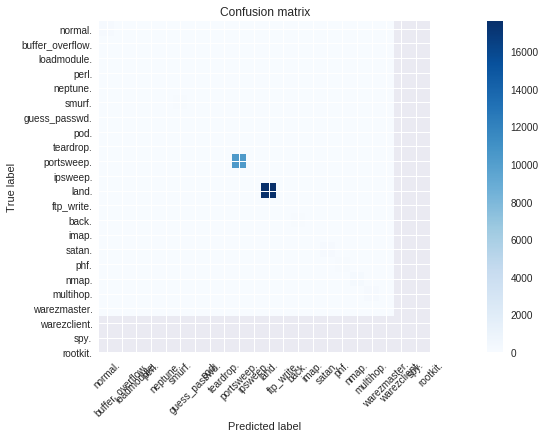

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       191
           1       1.00      0.50      0.67         6
           2       1.00      0.20      0.33         5
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         1
           5       0.97      0.97      0.97       137
           6       1.00      1.00      1.00         2
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         2
           9       1.00      1.00      1.00     10357
          10       0.93      0.74      0.82        38
          11       1.00      1.00      1.00     17589
          14       1.00      1.00      1.00        34
          15       0.99      1.00      0.99        92
          16       0.00      0.00      0.00         1
          17       0.98      0.99      0.98       158
          18       1.00      0.98      0.99       132
          20       1.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
cm = confusion_matrix(y_true, pred_c)
print(cm)


print('Plotting confusion matrix')

plt.figure(figsize=(16,6))
plot_confusion_matrix(cm,name)
plt.show()

print(classification_report(y_true, pred_c))

##CNN


In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [0]:
x_train,x_test,y_train,y_test = train_test_split(input_array,output_array,test_size=0.2,random_state=42)

In [0]:
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1], 1)

In [0]:
x_train.shape

(116468, 1, 121, 1)

In [0]:
x_test.shape

(29117, 1, 121, 1)

In [0]:
num_classes = 23
#Convert class vectors to one hot format
y_train = keras.utils.to_categorical(y_train,num_classes)
print(y_train[:1])
y_test = keras.utils.to_categorical(y_test,num_classes)
print(x_train.shape)
print(y_train.shape)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(116468, 1, 121, 1)
(116468, 23)


In [0]:
y_test.shape

(29117, 23)

In [0]:
y_train.shape

(116468, 23)

In [0]:
checkpointer_cnn = ModelCheckpoint(filepath="./best_weights_cnn_af.hdf5", verbose=23, save_best_only=True)


In [0]:



for i in range(2):
    cnn_a = Sequential()

    # Conv2D layer 1
    cnn_a.add(Conv2D(64, kernel_size=(1, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=(1,121, 1)))
    cnn_a.add(MaxPooling2D(pool_size=(1, 2), strides=None))
    cnn_a.add(Conv2D(32, kernel_size=(1, 3), strides=(1, 1),
                     activation='relu'))
    cnn_a.add(MaxPooling2D(pool_size=(1, 2)))

    cnn_a.add(Flatten())
    cnn_a.add(Dense(100, activation="relu"))
    cnn_a.add(Dropout(0.5))
    cnn_a.add(Dense(23, activation="softmax"))

    cnn_a.compile(loss="categorical_crossentropy", optimizer="adam" , metrics = ['accuracy'])
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=2, mode='auto') 
    # save best model
    cnn_a.fit(x_train, y_train, 
                batch_size=128, 
                callbacks=[monitor,checkpointer_cnn], 
                epochs=10, 
                verbose=2, 
                validation_data=(x_test, y_test))

    print('Training finished...Loading the best model') 
    print()
    cnn_a.load_weights('./best_weights_cnn_af.hdf5')

Train on 116468 samples, validate on 29117 samples
Epoch 1/10
 - 33s - loss: 0.1279 - acc: 0.9749 - val_loss: 0.0262 - val_acc: 0.9950

Epoch 00001: val_loss did not improve from 0.01376
Epoch 2/10
 - 31s - loss: 0.0342 - acc: 0.9921 - val_loss: 0.0223 - val_acc: 0.9955

Epoch 00002: val_loss did not improve from 0.01376
Epoch 3/10
 - 31s - loss: 0.0285 - acc: 0.9932 - val_loss: 0.0197 - val_acc: 0.9956

Epoch 00003: val_loss did not improve from 0.01376
Epoch 4/10
 - 31s - loss: 0.0241 - acc: 0.9942 - val_loss: 0.0186 - val_acc: 0.9962

Epoch 00004: val_loss did not improve from 0.01376
Epoch 5/10
 - 31s - loss: 0.0217 - acc: 0.9950 - val_loss: 0.0158 - val_acc: 0.9966

Epoch 00005: val_loss did not improve from 0.01376
Epoch 6/10
 - 31s - loss: 0.0208 - acc: 0.9951 - val_loss: 0.0161 - val_acc: 0.9961

Epoch 00006: val_loss did not improve from 0.01376
Epoch 7/10
 - 31s - loss: 0.0175 - acc: 0.9959 - val_loss: 0.0143 - val_acc: 0.9971

Epoch 00007: val_loss did not improve from 0.013

In [0]:
cnn_a.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 1, 119, 64)        256       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 1, 59, 64)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 1, 57, 32)         6176      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 1, 28, 32)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 896)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 100)               89700     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
__________

In [0]:
score_cnn = cnn_a.evaluate(x_test, y_test, verbose=0)
score_cnn

[0.013202828231801592, 0.9973898409863654]

In [0]:
pred_cnn_a = cnn_a.predict(x_test)
pred_cnn_a = np.argmax(pred_cnn_a,axis=1)
pred_cnn_a

array([11, 17, 11, ..., 18,  9,  9])

In [0]:
y_true = np.argmax(y_test,axis=1)
y_true

array([11, 17, 11, ..., 18,  9,  9])

In [0]:
score_acc_cnn = metrics.accuracy_score(y_true,pred_cnn_a)
print("Accuracy score: {}".format(score_cnn))

score_precision_cnn = metrics.precision_score(y_true,pred_cnn_a, average= "weighted")
print("Precision score: {}".format(score_precision_cnn))

score_recall_cnn = metrics.recall_score(y_true, pred_cnn_a, average= "weighted")
print("Recall score: {}".format(score_recall_cnn))

score_f1_cnn = metrics.f1_score(y_true,pred_cnn_a, average= "weighted")
print("F1 score: {}".format(score_f1_cnn))

Accuracy score: [0.013202828231801592, 0.9973898409863654]
Precision score: 0.9971259176083027
Recall score: 0.9973898409863654
F1 score: 0.9972168899020845


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[  190     0     0     0     0     0     0     0     0     0     0     1
      0     0     0     0     0     0     0     0]
 [    0     3     0     0     0     0     0     2     0     0     0     0
      0     0     0     0     0     0     1     0]
 [    0     0     1     0     0     0     0     0     0     0     0     2
      0     0     0     0     0     0     2     0]
 [    0     0     0    10     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     1     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0   133     0     0     0     0     2     2
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     2     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]


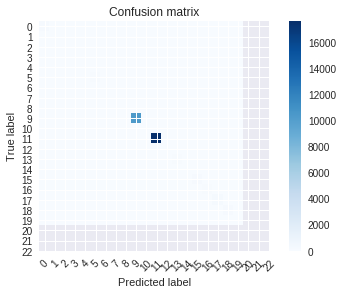

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       191
           1       1.00      0.50      0.67         6
           2       1.00      0.20      0.33         5
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         1
           5       0.97      0.97      0.97       137
           6       1.00      1.00      1.00         2
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         2
           9       1.00      1.00      1.00     10357
          10       0.93      0.74      0.82        38
          11       1.00      1.00      1.00     17589
          14       1.00      1.00      1.00        34
          15       0.99      1.00      0.99        92
          16       0.00      0.00      0.00         1
          17       0.98      0.99      0.98       158
          18       1.00      0.98      0.99       132
          20       1.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
cm = confusion_matrix(y_true, pred_c)
print(cm)


print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
plt.show()

print(classification_report(y_true, pred_c))